In [39]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
tqqq = pd.read_csv('./data/stock/tqqq/TQQQ.csv')
qqq = pd.read_csv('./data/stock/qqq/QQQ.csv')

time_window = 30
stock = tqqq

In [41]:
stock = stock.set_index('Date')
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-22,88.290001,92.870003,88.290001,91.089996,91.089996,35275300
2021-03-23,92.050003,93.230003,89.169998,89.900002,89.900002,46945200
2021-03-24,91.089996,91.120003,85.250000,85.360001,85.360001,47620900
2021-03-25,83.820000,86.180000,81.650002,84.900002,84.900002,59968600
2021-03-26,84.720001,88.970001,83.529999,88.650002,88.650002,53680500


In [42]:
# train_data = stock.loc[:len(stock)/4 * 3 - 1]
train_data = stock

In [43]:
test_data = stock.iloc[int(len(stock) /4 * 3):]

In [44]:
train_data.shape

(2800, 6)

In [45]:
test_data.shape

(700, 6)

In [46]:
from sklearn import preprocessing

In [47]:
sc = preprocessing.StandardScaler()
train_data_scaled = sc.fit_transform(train_data.values)

In [48]:
train_data_scaled

array([[-0.77521834, -0.77212649, -0.77773787, -0.77342064, -0.77277339,
        -1.52556688],
       [-0.77385726, -0.77182213, -0.77645336, -0.77324711, -0.77260029,
        -1.41964524],
       [-0.77153278, -0.77046996, -0.77451878, -0.77159874, -0.77095596,
        -1.39869804],
       ...,
       [ 3.64259205,  3.55086293,  3.47218085,  3.36613023,  3.36706113,
         0.36383434],
       [ 3.28682334,  3.31423656,  3.29098821,  3.34359409,  3.34452401,
         0.8721866 ],
       [ 3.3308663 ,  3.44787774,  3.38561094,  3.52731306,  3.52825088,
         0.61330682]])

In [49]:
x_train = []
y_train = []

for i in range(time_window, len(train_data_scaled)):
    x_train.append(train_data_scaled[i-time_window:i])
    y_train.append(train_data_scaled[i])

x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
x_train.shape

(2770, 30, 6)

In [51]:
y_train.shape

(2770, 6)

In [52]:
x_train

array([[[-0.77521834, -0.77212649, -0.77773787, -0.77342064,
         -0.77277339, -1.52556688],
        [-0.77385726, -0.77182213, -0.77645336, -0.77324711,
         -0.77260029, -1.41964524],
        [-0.77153278, -0.77046996, -0.77451878, -0.77159874,
         -0.77095596, -1.39869804],
        ...,
        [-0.75883985, -0.75789122, -0.76165807, -0.75875374,
         -0.75814251, -1.02718183],
        [-0.75845756, -0.75828539, -0.76115475, -0.75956515,
         -0.75895194, -0.67819372],
        [-0.7574941 , -0.75687334, -0.76119668, -0.7599173 ,
         -0.75930322, -0.62997566]],

       [[-0.77385726, -0.77182213, -0.77645336, -0.77324711,
         -0.77260029, -1.41964524],
        [-0.77153278, -0.77046996, -0.77451878, -0.77159874,
         -0.77095596, -1.39869804],
        [-0.77029409, -0.76982628, -0.77323427, -0.77084858,
         -0.77020763, -1.2018735 ],
        ...,
        [-0.75845756, -0.75828539, -0.76115475, -0.75956515,
         -0.75895194, -0.67819372],
  

In [53]:
y_train

array([[-0.75842188, -0.75781137, -0.76175767, -0.75962639, -0.75901303,
        -0.72917839],
       [-0.75808036, -0.75754193, -0.76048892, -0.75885579, -0.75824432,
        -1.20503534],
       [-0.75768784, -0.75704296, -0.76064621, -0.75825873, -0.7576487 ,
        -1.18606429],
       ...,
       [ 3.64259205,  3.55086293,  3.47218085,  3.36613023,  3.36706113,
         0.36383434],
       [ 3.28682334,  3.31423656,  3.29098821,  3.34359409,  3.34452401,
         0.8721866 ],
       [ 3.3308663 ,  3.44787774,  3.38561094,  3.52731306,  3.52825088,
         0.61330682]])

In [54]:
model = tf.keras.models.Sequential()

# first LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window, activation='relu', return_sequences=True, input_shape=(time_window, 6)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window + 20, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=time_window + 40, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(6))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 30)            4440      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 30)            7320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 30, 50)            16200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 70)               

In [56]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [38]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/100
87/87 [==============================] - 6s 32ms/step - loss: 0.4429
Epoch 2/100
87/87 [==============================] - 3s 31ms/step - loss: 0.2605
Epoch 3/100
87/87 [==============================] - 2s 28ms/step - loss: 0.2424
Epoch 4/100
87/87 [==============================] - 2s 27ms/step - loss: 0.2233
Epoch 5/100
87/87 [==============================] - 2s 27ms/step - loss: 0.2074
Epoch 6/100
87/87 [==============================] - 2s 28ms/step - loss: 0.1985
Epoch 7/100
65/87 [=====================>........] - ETA: 0s - loss: 0.1956

KeyboardInterrupt: 

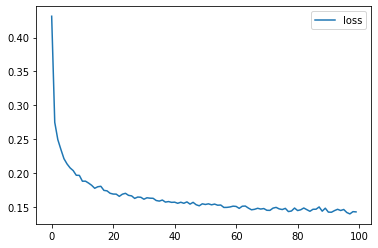

In [285]:
pd.DataFrame(history.history).plot()

In [286]:
# # Prediction based on last time frame real stock value

# dataset_total = pd.concat((train_data, test_data), axis = 0)

# inputs = dataset_total[len(dataset_total) - len(test_data) - time_window:].values

# inputs = sc.fit_transform(inputs)

# x_test = []
# for i in range(time_window, len(test_data) + time_window):
#     x_test.append(inputs[i-time_window:i])

# x_test = np.array(x_test)
# x_test.shape

(700, 30, 6)

In [287]:
# predicted_stock = model.predict(x_test)
# predicted_stock = sc.inverse_transform(predicted_stock)
# predicted_stock = pd.DataFrame(predicted_stock)

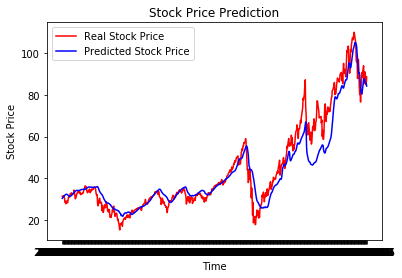

In [288]:
# real_stock_price = test_data.iloc[:, 3]
# predicted_stock_price = predicted_stock.iloc[:, 3]

# # plot
# # Visualising the results
# plt.plot(real_stock_price, color='red', label='Real Stock Price')
# plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
# plt.title('Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

In [291]:
test_data[-time_window:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-12,107.580002,110.300003,106.440002,110.110001,110.110001,19330400
2021-02-16,110.959999,111.860001,108.080002,109.190002,109.190002,22165900
2021-02-17,106.230003,107.940002,104.010002,107.669998,107.669998,26496700
2021-02-18,104.059998,106.959999,102.279999,106.220001,106.220001,27550500
2021-02-19,107.639999,107.680000,103.860001,104.820000,104.820000,23344300
2021-02-22,100.540001,101.800003,96.500000,96.699997,96.699997,33183700
2021-02-23,91.779999,97.360001,86.419998,95.839996,95.839996,49818700
2021-02-24,93.239998,98.470001,90.900002,98.150002,98.150002,30760500
2021-02-25,95.620003,98.070000,86.449997,87.900002,87.900002,59448000


In [292]:
# Predict next day
inputs = stock[-time_window:].values

inputs = sc.fit_transform(inputs)

x_test = np.array(inputs)
x_test = np.reshape(x_test, (-1, time_window, 6))
x_test.shape

(1, 30, 6)

In [293]:
predicted_stock = model.predict(x_test)
predicted_stock = sc.inverse_transform(predicted_stock)
predicted_stock = pd.DataFrame(predicted_stock)

In [294]:
predicted_stock

,0,1,2,3,4,5
0,88.797722,91.384064,85.061668,88.010689,88.011963,47226296.0


In [302]:
# predict next time window

from pandas.tseries.offsets import DateOffset


predict_data = stock.copy().iloc[-time_window:]

for i in range(time_window, time_window + time_window):
    inputs = predict_data[i-time_window:i].values
    inputs = sc.fit_transform(inputs)
    inputs = np.array(inputs)
    inputs = np.reshape(inputs, (-1, time_window, 6))
    predict = model.predict(inputs)
    predict = sc.inverse_transform(predict).reshape(-1)

    last_date = pd.to_datetime(predict_data.index[-1])
    if last_date.day_name() == 'Friday':
        new_date = last_date + DateOffset(days=3)
    else:
        new_date = last_date + DateOffset(days=1)
    predict_data = predict_data.append(pd.Series(dict(zip(list(predict_data.columns), predict)), name=new_date.strftime('%Y-%m-%d')))


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-12,107.580002,110.300003,106.440002,110.110001,110.110001,19330400.0
2021-02-16,110.959999,111.860001,108.080002,109.190002,109.190002,22165900.0
2021-02-17,106.230003,107.940002,104.010002,107.669998,107.669998,26496700.0
2021-02-18,104.059998,106.959999,102.279999,106.220001,106.220001,27550500.0
2021-02-19,107.639999,107.680000,103.860001,104.820000,104.820000,23344300.0
2021-02-22,100.540001,101.800003,96.500000,96.699997,96.699997,33183700.0
2021-02-23,91.779999,97.360001,86.419998,95.839996,95.839996,49818700.0
2021-02-24,93.239998,98.470001,90.900002,98.150002,98.150002,30760500.0
2021-02-25,95.620003,98.070000,86.449997,87.900002,87.900002,59448000.0
